# Titanic Wrangling

In this practice activity you'll continue to work with the titanic dataset in ways that flex what you've learned about both data wrangling and data visualization.

In [ ]:
# Import the titanic dataset here
!pip install pandas
!pip install numpy


In [96]:
import pandas as pd
import numpy as np
from plotnine import *
import seaborn as sns
import matplotlib.pyplot as plt

data_dir = "https://dlsun.github.io/pods/data/"
df_titanic = pd.read_csv(data_dir + "titanic.csv")

## 1. Filter the data to include passengers only. Calculate the joint distribution (cross-tab) between a passenger's class and where they embarked.

In [4]:
df_titanic

,name,gender,age,class,embarked,country,ticketno,fare,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,0
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,1
...,...,...,...,...,...,...,...,...,...
2202,"Wynn, Mr. Walter",male,41.0,deck crew,B,England,NaN,NaN,1
2203,"Yearsley, Mr. Harry",male,40.0,victualling crew,S,England,NaN,NaN,1
2204,"Young, Mr. Francis James",male,32.0,engineering crew,S,England,NaN,NaN,0
2205,"Zanetti, Sig. Minio",male,20.0,restaurant staff,S,England,NaN,NaN,0


In [5]:
# Code here

df_titanic_Filtered = df_titanic[(df_titanic["class"] == "1st") |
                                 (df_titanic["class"] == "2nd") |
                                 (df_titanic["class"] == "3rd")]
df_titanic_Filtered

,name,gender,age,class,embarked,country,ticketno,fare,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.1100,0
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.0500,0
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.0500,0
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.0500,1
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.1300,1
...,...,...,...,...,...,...,...,...,...
1314,"Yvois, Miss. Henriette",female,24.0,2nd,S,France,248747.0,13.0000,0
1315,"Zakarian, Mr. Mapriededer",male,22.0,3rd,C,Turkey,2656.0,7.0406,0
1316,"Zakarian, Mr. Ortin",male,27.0,3rd,C,Turkey,2670.0,7.0406,0
1317,"Zenni, Mr. Philip",male,25.0,3rd,C,Lebanon,2620.0,7.0406,1


In [6]:
pd.crosstab(df_titanic_Filtered["class"], df_titanic_Filtered["embarked"])

embarked,B,C,Q,S
class,,,,
1st,3,143,3,175
2nd,6,26,7,245
3rd,0,102,113,494


## 2. Using the joint distribution that calculated above, calculate the following:

* the conditional distribution of their class given where they embarked
* the conditional distribution of where they embarked given their class

Use the conditional distributions that you calculate to answer the following quesitons:

* What proportion of 3rd class passengers embarked at Southampton?
* What proportion of Southampton passengers were in 3rd class?

In [86]:
# Code here

#Group by embarked, count instances for each unique value under class, dividing by total class for each value of embarked
df_dist1 = df_titanic_Filtered.groupby('embarked')['class'].value_counts() / df_titanic_Filtered.groupby('embarked')['class'].count()
df_dist1

#Turn this into a data frame + give a name to whatever column that does not have one
df_dist1 = df_dist1.reset_index(name='probability')
df_dist1

#Turn each row of 1st, 2nd, 3rd class into its own columns
# df_dist1 = df_dist1.pivot(index='embarked', columns='class', values='probability')
# df_dist1

,embarked,class,probability
0,B,2nd,0.666667
1,B,1st,0.333333
2,C,1st,0.527675
3,C,3rd,0.376384
4,C,2nd,0.095941
5,Q,3rd,0.918699
6,Q,2nd,0.056911
7,Q,1st,0.024390
8,S,3rd,0.540481
9,S,2nd,0.268053


54% of passengers who are 3rd class embarked from South Hampton

In [83]:
#Code here

#Group by embarked, count instances for each unique value under class, dividing by total class for each value of embarked
df_dist2 = df_titanic_Filtered.groupby('class')['embarked'].value_counts() / df_titanic_Filtered.groupby('class')['embarked'].count()
df_dist2

#Turn this into a data frame + give a name to whatever column that does not have one
df_dist2 = df_dist2.reset_index(name='probability')

df_dist2

#Turn each row of 1st, 2nd, 3rd class into its own columns
df_dist2 = df_dist2.pivot(index='embarked', columns='class', values='probability')
df_dist2


,class,embarked,probability
0,1st,S,0.540123
1,1st,C,0.441358
2,1st,B,0.009259
3,1st,Q,0.009259
4,2nd,S,0.862676
5,2nd,C,0.091549
6,2nd,Q,0.024648
7,2nd,B,0.021127
8,3rd,S,0.696756
9,3rd,Q,0.159379


69% of South Hampton passengers were in 3rd class.

## 3. Make a visualization showing the distribution of a passenger's class, given where they embarked.

Discuss the pros and cons of using this visualization versus the distributions you calculated before, to answer the previous questions.

[Text(0.5, 1.0, 'The most spectacular plot ever made')]

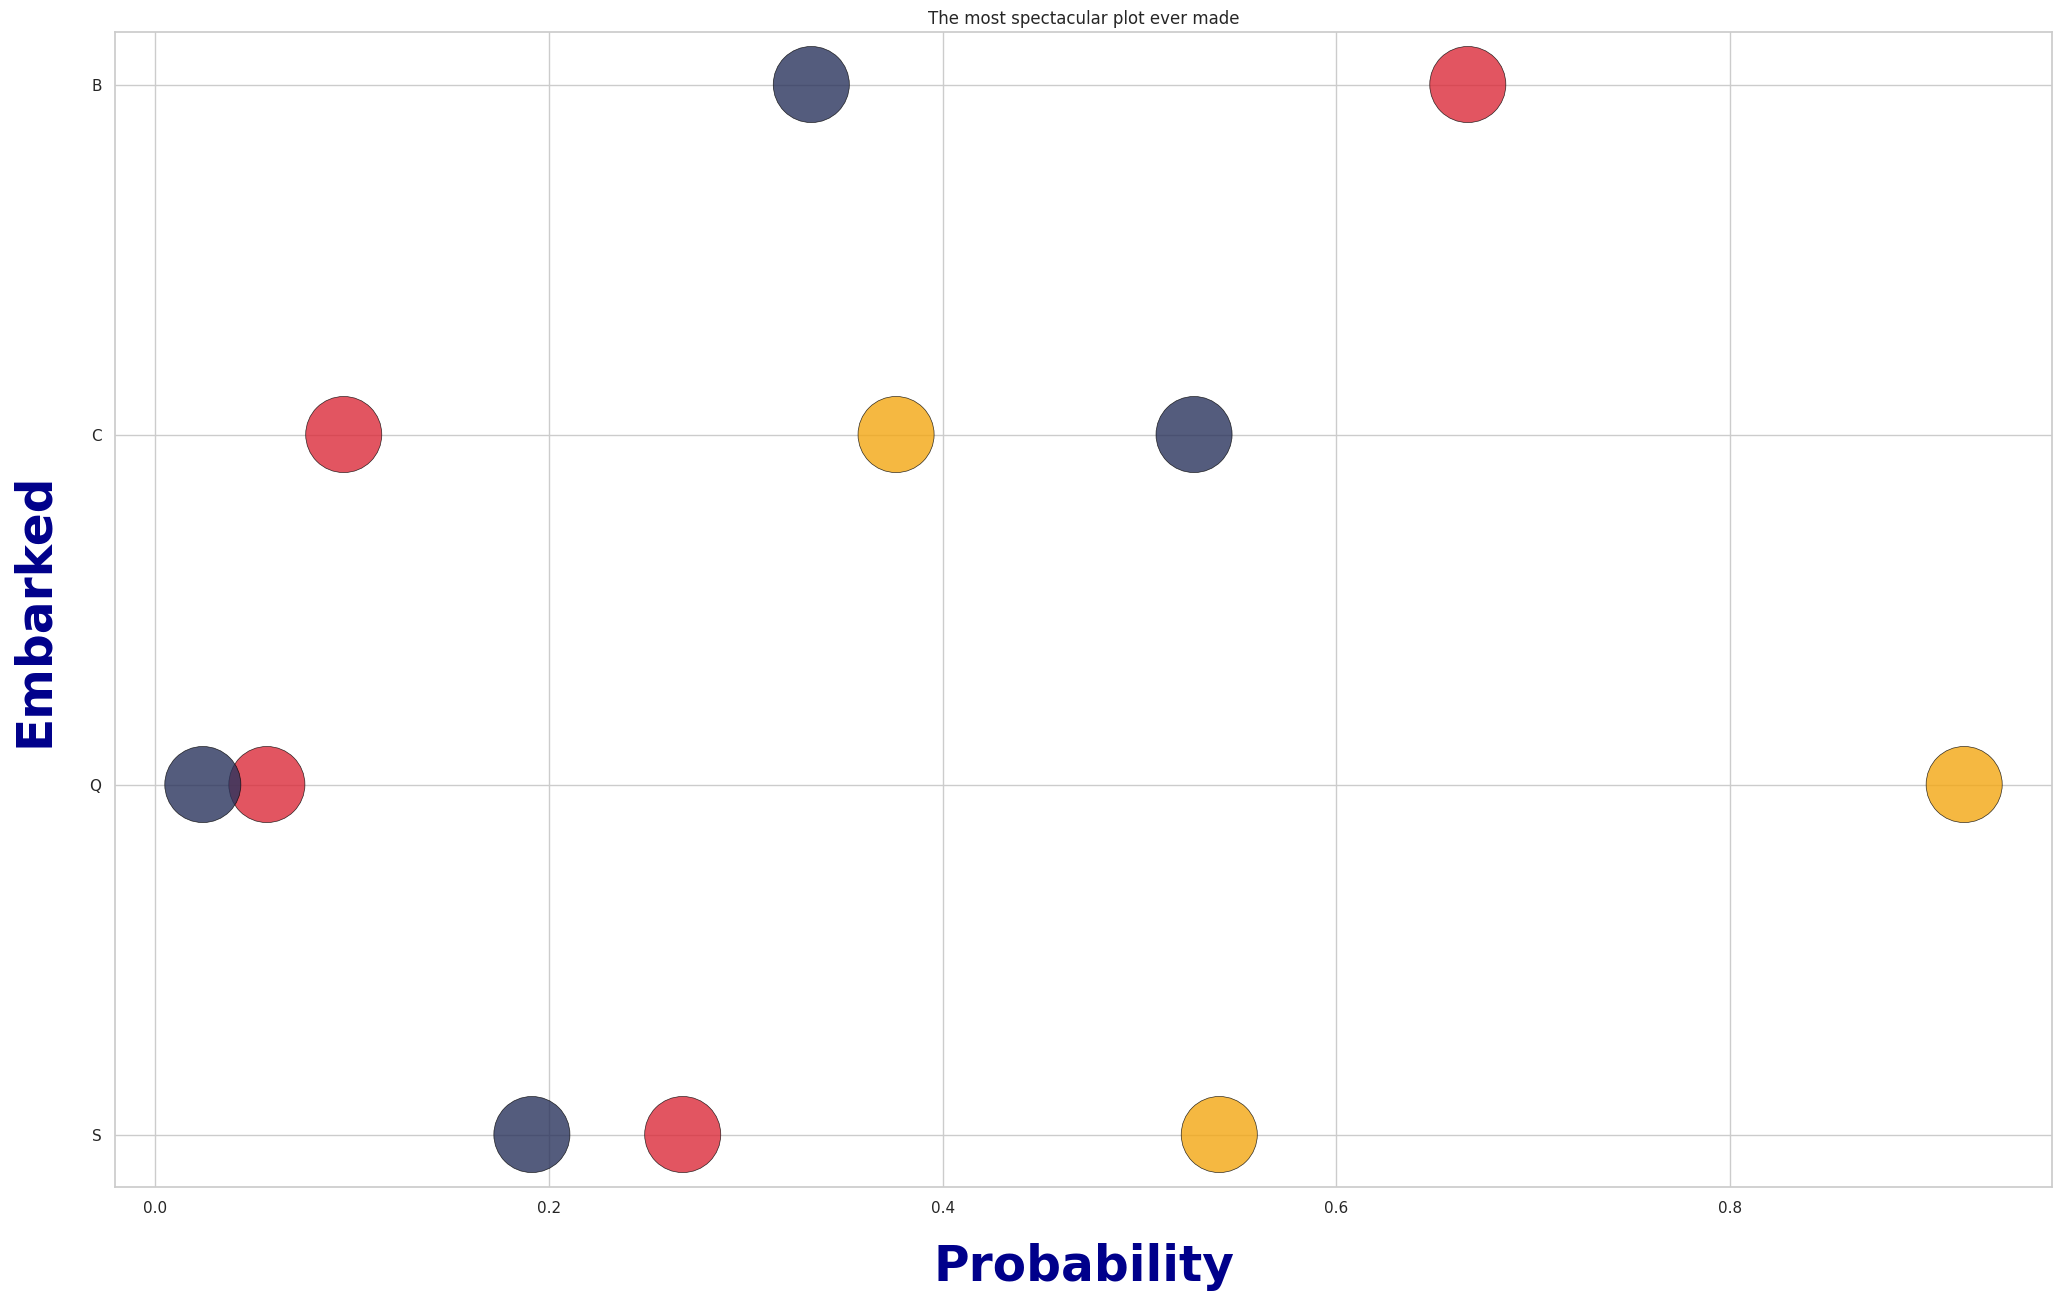

In [108]:
# Code here
sns.set_theme()
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = [25, 15]

colors = ["#DB2B39", "#29335C", "#F3A712", "#F0CEA0", "#534D41"]
sns.set_palette(sns.color_palette(colors))

q1_graph = sns.scatterplot(data = df_dist1,
               x = "probability",
               y = "embarked",
               hue = "class",
               legend = False,
               alpha = 0.8,
               edgecolor = 'black',
               linewidth = 0.5,
               s = 3000,
               zorder = 3)

plt.xlabel("Probability",
           fontweight = "bold",
           font = "Sans Serif",
           color = "darkblue",
           fontsize = '35',
           horizontalalignment='center',
           labelpad = 20)

plt.ylabel("Embarked",
           fontweight = "bold",
           font = "Sans Serif",
           color = "darkblue",
           fontsize = '35',
           verticalalignment='center',
           labelpad = 40)

q1_graph.set(title = "The most spectacular plot ever made")
